# MNIST Dataset: 60.000 Hand Written Number Images Classification Using Deep Learning

Dataset:
> https://www.kaggle.com/datasets/rakuraku678/mnist-60000-hand-written-number-images

References:
> References by HIMANSHU YADAV in kaggle <br>
> https://www.kaggle.com/code/himanshuyadav95627/image-classification

In [1]:
# Connect GColab with GDrive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import tensorflow as tf
from tensorflow import keras


# Load data
train_df = pd.read_csv("/content/drive/MyDrive/Learning AI/mnist_train.csv", header=None)
test_df = pd.read_csv("/content/drive/MyDrive/Learning AI/mnist_test.csv", header=None)

# Display data
display(train_df.head())
print(train_df.shape)
display(test_df.head())
print(test_df.shape)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(60000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(10000, 785)


In [3]:
# Split x & y, train & test
x_train = train_df.drop(0, axis=1).values
y_train = train_df[0].values

x_test = test_df.drop(0, axis=1).values
y_test = test_df[0].values


image-21778 8


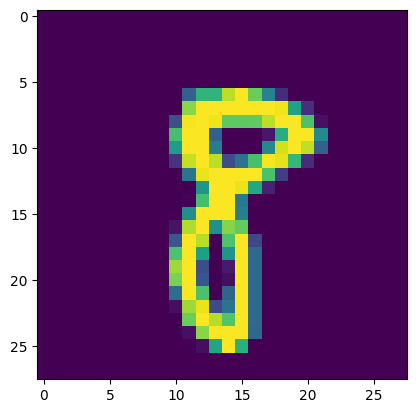

In [4]:
# Generate image from matrix for sample display
import secrets

n = secrets.randbelow(60_000-1)
print(f"image-{n} {y_train[n]}")
plt.imshow(x_train[n].reshape(28,28))


In [5]:
model = keras.Sequential([
    keras.layers.Dense(256, input_shape=(784,), activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(x_train, y_train, epochs=16)
model.save('/content/drive/MyDrive/Learning AI/my_first_dl_model_ever.h5')


Epoch 1/16
1875/1875 [==============================] - 23s 11ms/step - loss: 0.8005 - accuracy: 0.7808
Epoch 2/16
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2073 - accuracy: 0.9431
Epoch 3/16
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1562 - accuracy: 0.9571
Epoch 4/16
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1281 - accuracy: 0.9658
Epoch 5/16
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1074 - accuracy: 0.9704
Epoch 6/16
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0898 - accuracy: 0.9751
Epoch 7/16
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0731 - accuracy: 0.9797
Epoch 8/16
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0691 - accuracy: 0.9818
Epoch 9/16
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0620 - accuracy: 0.9832
Epoch 10/16
1875/1875 [==============================] - 14s 7ms/step - 

In [6]:
# Evalute model to test dataset
model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.1202 - accuracy: 0.9782


[0.12019392102956772, 0.9782000184059143]

In [7]:
y_pred = model.predict(x_test)
y_pred


313/313 [==============================] - 1s 2ms/step


array([[1.4732659e-19, 1.4062210e-08, 4.2065582e-09, ..., 9.9999815e-01,
        1.6972698e-10, 1.7008819e-06],
       [8.8649102e-25, 5.2783252e-29, 9.9999994e-01, ..., 1.1527340e-28,
        3.6683346e-19, 1.0929154e-36],
       [7.8482050e-20, 9.9999994e-01, 5.4362481e-10, ..., 2.7546190e-22,
        8.7695467e-12, 1.4439229e-21],
       ...,
       [3.8626575e-13, 4.5320752e-09, 8.1193576e-12, ..., 1.9353061e-10,
        1.8704539e-10, 7.8677367e-08],
       [4.6927925e-23, 0.0000000e+00, 0.0000000e+00, ..., 2.4376330e-26,
        2.6335369e-20, 1.9236229e-20],
       [4.0060701e-13, 6.6414686e-23, 5.1129228e-22, ..., 0.0000000e+00,
        8.4454020e-13, 8.4623585e-37]], dtype=float32)

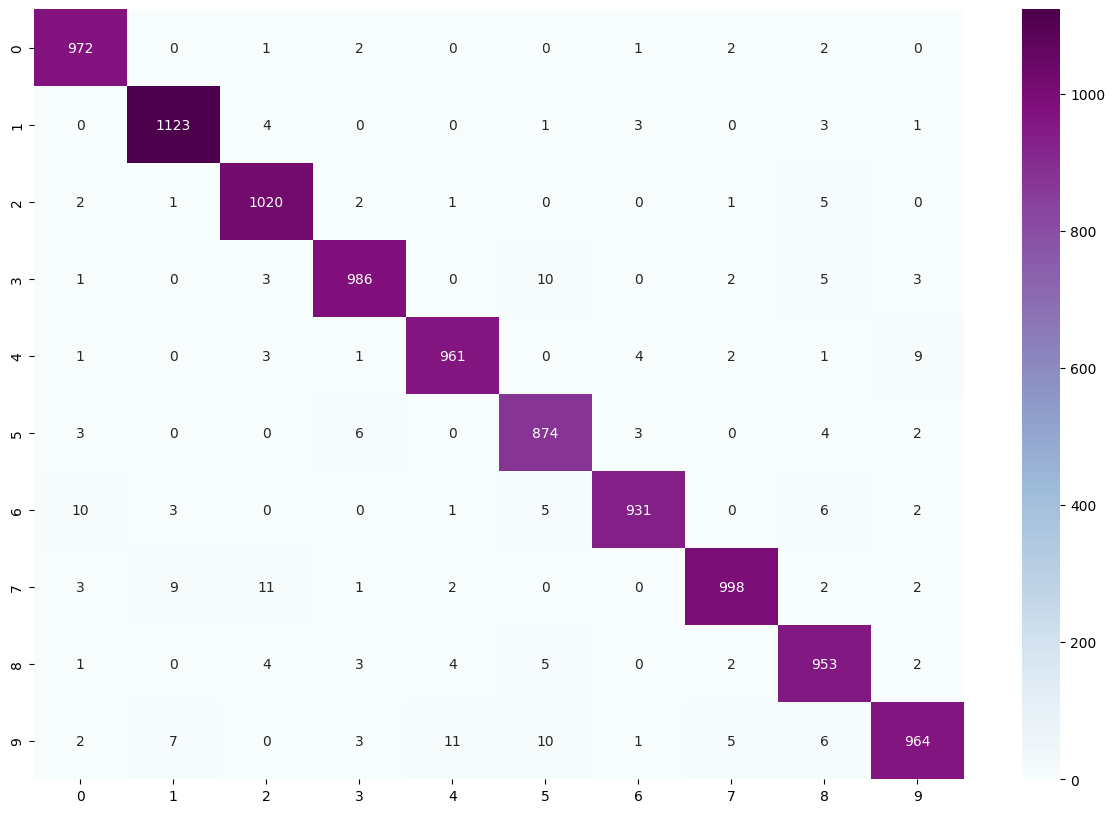

In [8]:
cf = tf.math.confusion_matrix(labels=y_test,predictions=[np.argmax(i) for i in y_pred])
plt.figure(figsize=(15,10))
sns.heatmap(cf,annot=True,fmt='d',cmap='BuPu');


In [9]:
def sample(i):
    print("actual label    = ", y_test[i])
    print("predicted label = ", np.argmax(y_pred[i]))
    print("\nThe corrosponding image")
    plt.imshow(x_test[i].reshape(28,28))


In [10]:
# Sample output neuron
for _ in y_pred[9]:
    print(f"{_:.10f}")


0.0000000000
0.0000000002
0.0000000000
0.0000000001
0.0000000003
0.0000000001
0.0000000000
0.0000000425
0.0000000040
0.9999999404


actual label    =  9
predicted label =  9

The corrosponding image


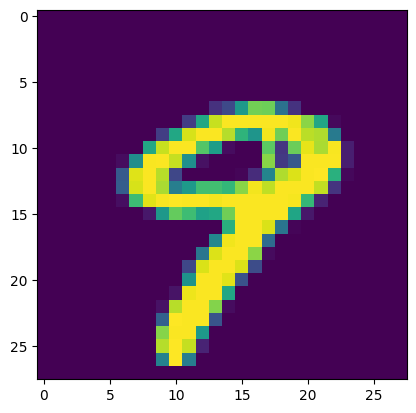

In [11]:
sample(9)


In [12]:
temp = []
for i in range(len(y_pred)):
    temp.append(int(np.argmax(y_pred[i])))

true_predict = 0
n_data = len(y_test)

for i in range(n_data):
    if y_test[i] == temp[i]:
        true_predict += 1
false_predict = len(y_test) - true_predict

print(true_predict)
print(false_predict)
print(f"accuracy {(true_predict/n_data)*100:.2f}%")


9782
218
accuracy 97.82%


## Try using LinearRegression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from math import floor, ceil

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# Prediction result
y_pred_ = lr_model.predict(x_test)


In [14]:
y_pred_up = np.copy(y_pred_)
y_pred_down = np.copy(y_pred_)
for i in range(len(y_pred_)):
    y_pred_up[i] = ceil(y_pred_[i])
    y_pred_down[i] = floor(y_pred_[i])


In [15]:
lr_result = pd.DataFrame(
    {"Actual": y_test.astype(np.int8),
     "Predict_rounded_normal": y_pred_.astype(np.int8),
     "Predict_rounded_up": y_pred_up.astype(np.int8),
     "Predict_rounded_down": y_pred_down.astype(np.int8)}
    )

lr_result


<ipython-input-15-cf271c61c39e>:3: RuntimeWarning: invalid value encountered in cast
  "Predict_rounded_normal": y_pred_.astype(np.int8),
<ipython-input-15-cf271c61c39e>:4: RuntimeWarning: invalid value encountered in cast
  "Predict_rounded_up": y_pred_up.astype(np.int8),
<ipython-input-15-cf271c61c39e>:5: RuntimeWarning: invalid value encountered in cast
  "Predict_rounded_down": y_pred_down.astype(np.int8)}


,Actual,Predict_rounded_normal,Predict_rounded_up,Predict_rounded_down
0,7,6,7,6
1,2,2,3,2
2,1,1,2,1
3,0,0,1,0
4,4,4,5,4
...,...,...,...,...
9995,2,2,3,2
9996,3,1,2,1
9997,4,7,8,7
9998,5,5,6,5


In [16]:
lr_result.dtypes

Actual                    int8
Predict_rounded_normal    int8
Predict_rounded_up        int8
Predict_rounded_down      int8
dtype: object

In [17]:
# How much error?
print(f"Predict      {mean_squared_error(lr_result['Actual'], lr_result['Predict_rounded_normal'])}")
print(f"Predict up   {mean_squared_error(lr_result['Actual'], lr_result['Predict_rounded_up'])}")
print(f"Predict down {mean_squared_error(lr_result['Actual'], lr_result['Predict_rounded_down'])}")

Predict      3.42
Predict up   3.52
Predict down 3.4481


In [18]:
# What's the accuracy?
print(f"accuracy      {accuracy_score(lr_result['Actual'], lr_result['Predict_rounded_normal'])*100}%")
print(f"accuracy up   {accuracy_score(lr_result['Actual'], lr_result['Predict_rounded_up'])*100}%")
print(f"accuracy down {accuracy_score(lr_result['Actual'], lr_result['Predict_rounded_down'])*100}%")

accuracy      25.95%
accuracy up   18.88%
accuracy down 24.81%


In [19]:
# Manual test accuracy
def manual_accuracy(y_pred_):
    true_predict = 0
    n_data = len(y_test)

    for i in range(n_data):
        if y_test[i] == y_pred_[i]:
            true_predict += 1
    false_predict = len(y_test) - true_predict

    print(f"true  {true_predict}")
    print(f"false {false_predict}")
    print(f"accuracy {(true_predict/n_data)*100:.4f}%\n")


In [20]:
manual_accuracy(lr_result['Predict_rounded_normal'])
manual_accuracy(lr_result['Predict_rounded_up'])
manual_accuracy(lr_result['Predict_rounded_down'])

true  2595
false 7405
accuracy 25.9500%

true  1888
false 8112
accuracy 18.8800%

true  2481
false 7519
accuracy 24.8100%



It's very bad to use LinearRegression for classification

In [21]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 244,890
Trainable params: 244,890
Non-trai

Visualize the DL model we have made..

In [22]:
# !pip3 install ann_visualizer

In [23]:
# from ann_visualizer.visualize import ann_viz;

# ann_viz(model, title="My first neural network")
